<a href="https://colab.research.google.com/github/ShubhKjoshi/Bike_sharing_demand_prediction_Capstone-_project_Regression/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of The day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
#Importing required modules like numpy and pandas.. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')



# Mounting the drive for importing the data

In [ ]:
from google.colab import drive  #
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the data from drive
rentalbike_df = pd.read_csv('/content/drive/MyDrive/Projects_capstones/Bike Sharing Demand Prediction - Regression Capstone/SeoulBikeData.csv',encoding ='latin')

# Data Summary

In [ ]:
rentalbike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
rentalbike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#checking the shape of the data
rentalbike_df.shape

(8760, 14)

This Dataset contains 8760 lines and 14 columns.

In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset.














In [ ]:
#columns in the data
rentalbike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
rentalbike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# checking the description of the data
rentalbike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
#Unique values 
rentalbike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

# Checking missing values

In [ ]:
# Checking for the null values in dataset
rentalbike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
count =len(rentalbike_df[rentalbike_df.duplicated()])
print(f'The number of duplicate values in the data set is {count}')

The number of duplicate values in the data set is 0


as we can see from above codes the dataset doesn't have any missing values and duplicate values 

In [ ]:
print(type(rentalbike_df['Date'][0]))# as Date column is in str format we need to convert it into date .

<class 'str'>


In [ ]:
#converting into date format..
rentalbike_df['Date'] = rentalbike_df['Date'].apply(lambda d: 
                                    dt.datetime.strptime(d,"%d/%m/%Y"))

In [ ]:
print(type(rentalbike_df['Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
#seperating year ,month and day from Date column
rentalbike_df['Month'] = rentalbike_df['Date'].dt.month
rentalbike_df['Day'] = rentalbike_df['Date'].dt.day_name()

In [ ]:
rentalbike_df.Day.value_counts()

Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: Day, dtype: int64

# Observing Datatypes

In [ ]:
# we are seperating all day data to two categories weekday and weekend
rentalbike_df['WeekdayorWeekend']=rentalbike_df['Day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 ) 
rentalbike_df=rentalbike_df.drop(columns=['Date','Day'],axis=1) # dropping old columns

In [ ]:
rentalbike_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,WeekdayorWeekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0


In [ ]:
rentalbike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Month                      8760 non-null   int64

In [ ]:
rentalbike_df.WeekdayorWeekend.value_counts()

0    6264
1    2496
Name: WeekdayorWeekend, dtype: int64

As we can see Hour, Month and WeekdayorWeekend have int datatype so we need to convert them into categorical(object)... 

In [ ]:
columns=['Hour','Month','WeekdayorWeekend'] # Changing the datatypes
for i in columns:
  rentalbike_df[i]=rentalbike_df[i].astype('object')

In [ ]:
rentalbike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   object 
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Month                      8760 non-null   objec

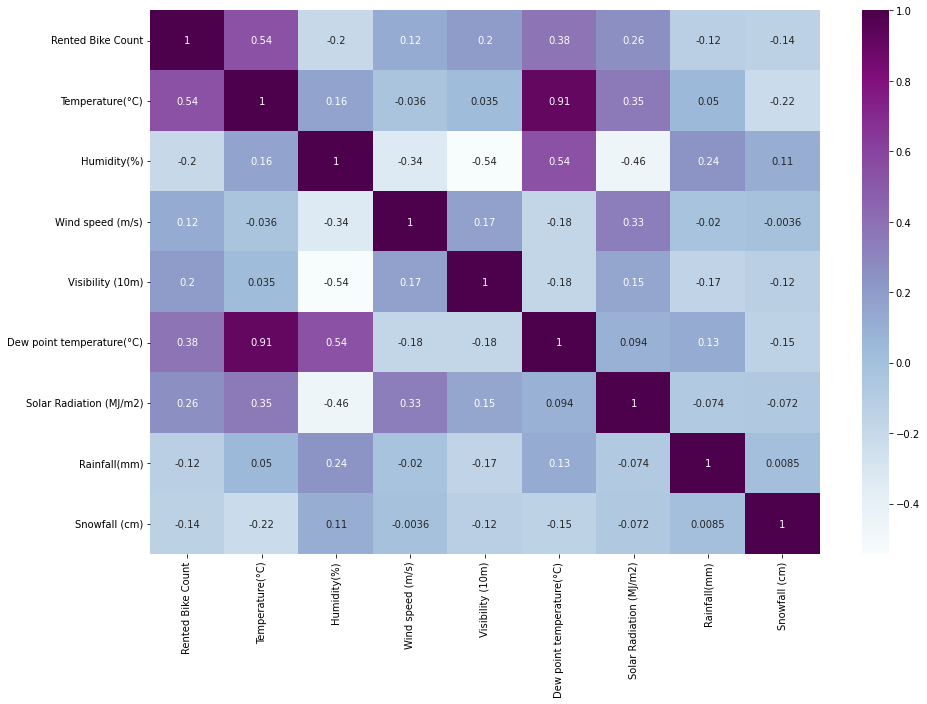

In [ ]:
#checking correlation using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(rentalbike_df.corr(),cmap='BuPu',annot=True)

From this graph we can see multicollinearity between Temperature and Dew point Temperature.

# Checking Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # calculating VIF values for our dataset featueres
def calculate_VIF(F):
 
   # Calculating VIF
   VIF = pd.DataFrame()
   VIF["variables"] = F.columns
   VIF["VIF"] = [variance_inflation_factor(F.values, i) for i in range(F.shape[1])]
 
   return(VIF)

In [ ]:
calculate_VIF(rentalbike_df[[i for i in rentalbike_df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Temperature(°C),29.075866
1,Humidity(%),5.069743
2,Wind speed (m/s),4.517664
3,Visibility (10m),9.051931
4,Dew point temperature(°C),15.201989
5,Solar Radiation (MJ/m2),2.821604
6,Rainfall(mm),1.079919
7,Snowfall (cm),1.118903


In [ ]:
calculate_VIF(rentalbike_df[[i for i in rentalbike_df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

,variables,VIF
0,Temperature(°C),3.166007
1,Humidity(%),4.758651
2,Wind speed (m/s),4.079926
3,Visibility (10m),4.409448
4,Solar Radiation (MJ/m2),2.246238
5,Rainfall(mm),1.078501
6,Snowfall (cm),1.118901


In [ ]:
rentalbike_df.drop(columns=['Dew point temperature(°C)'],inplace=True) #dropping Dew point temperature as it increases VIF ...

# EDA

EDA helps us to identify trends, patterns, and relationships in the data that are not readily apparent.

In [ ]:
# Dividing Data in categorical and numerical features
Numerical_Features= rentalbike_df.select_dtypes(exclude='object')
Categorical_Features=rentalbike_df.select_dtypes(include='object')

In [ ]:
Numerical_Features.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0


In [ ]:
Categorical_Features.head()

,Hour,Seasons,Holiday,Functioning Day,Month,WeekdayorWeekend
0,0,Winter,No Holiday,Yes,12,0
1,1,Winter,No Holiday,Yes,12,0
2,2,Winter,No Holiday,Yes,12,0
3,3,Winter,No Holiday,Yes,12,0
4,4,Winter,No Holiday,Yes,12,0


# Lets Explore our categorical Features ..

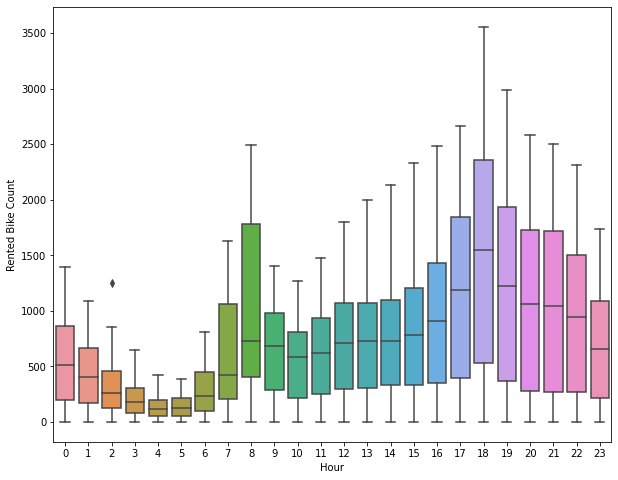

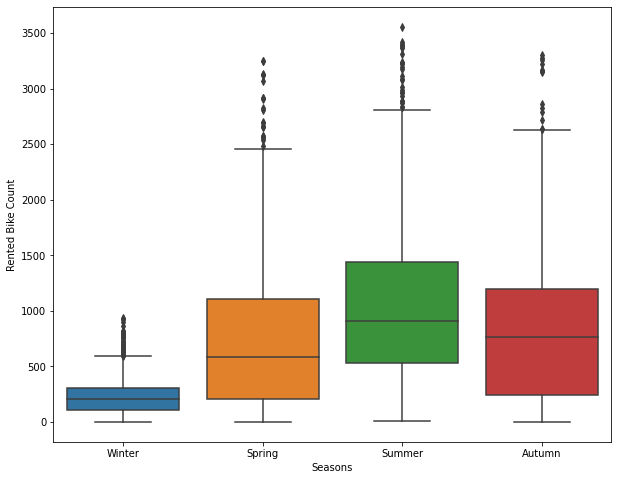

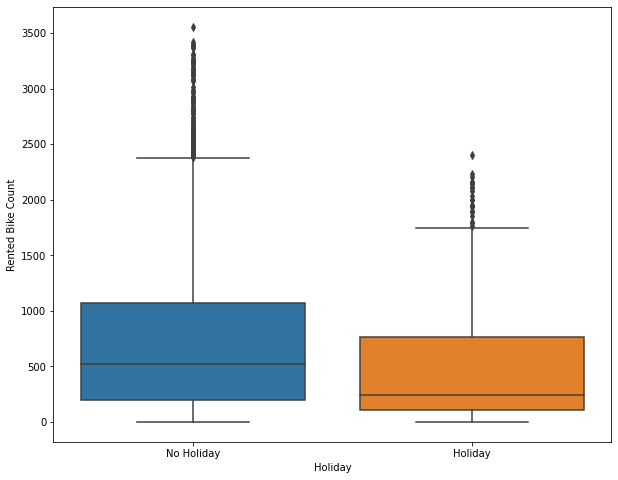

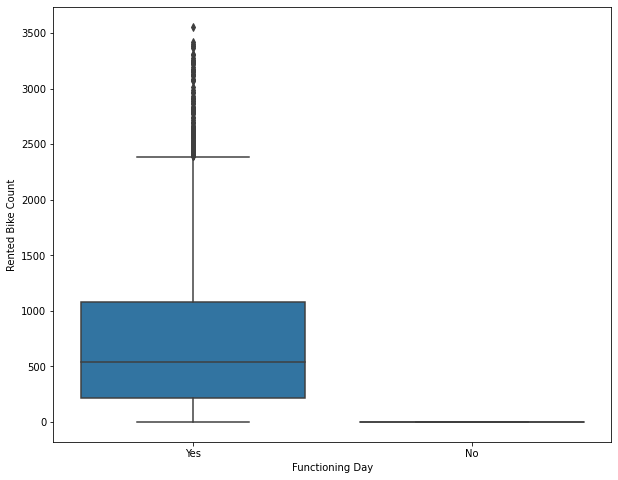

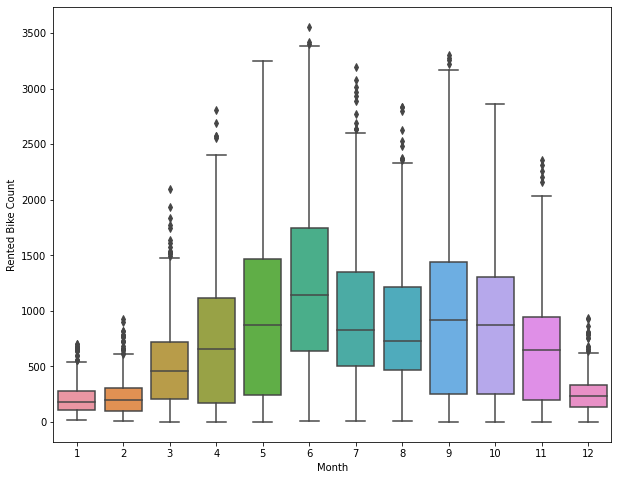

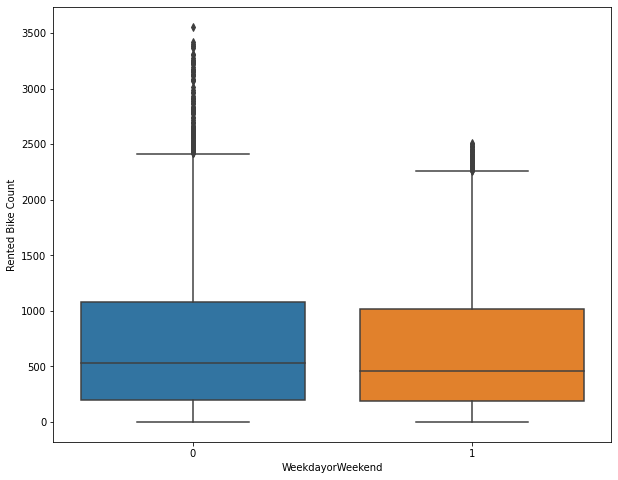

In [ ]:
#ploting Box plot to visualize and get some information from the features..
for col in Categorical_Features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=rentalbike_df[col],y=rentalbike_df["Rented Bike Count"])
  plt.show()

**Conclusion**

Less demand on winter season and more demand is in summer season.

Sligthly Higher demand during Non holidays.

Almost no demnad on non functioning day.

Most demand for bike is in between 7 to 9 AM and 5 to 8 PM .

More demand is in months May , June , July , August , september, November (Summer season) and less demand in december , January and February(Winter Season).




Weekday or weekend doesnt affect the rented bike count , we will try to see on the basis of hours how it affects.

[Text(0.5, 1.0, 'Count of Rented bikes acording to WeekdaysorWeekend ')]

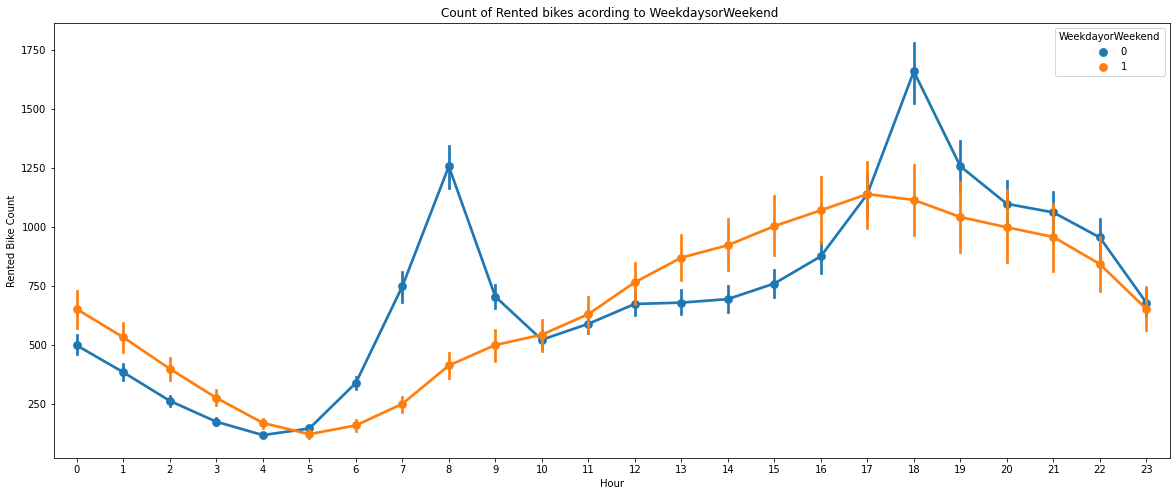

In [ ]:
#hourly analysis of weekdayorweekend feature 
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=rentalbike_df,x='Hour',y='Rented Bike Count',hue='WeekdayorWeekend',ax=ax)
ax.set(title='Count of Rented bikes acording to WeekdaysorWeekend ')

For Weekdays the count is higher in Morning 7 to 9 Am and then in the evening 5 to 8 PM 

For weekends count is low in the morning but it gradually increases after 10 AM.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Now we will start to explore our numerical features..

1) First we will check oour dependent variable..

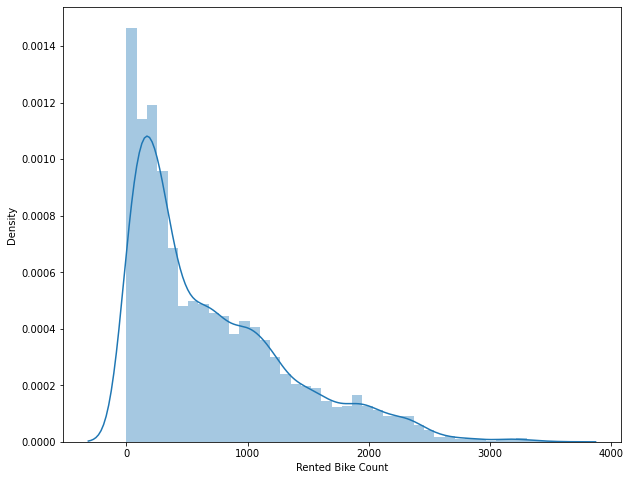

In [ ]:
#plotting  the dependent variable
plt.figure(figsize=(10,8))
sns.distplot(rentalbike_df['Rented Bike Count'])

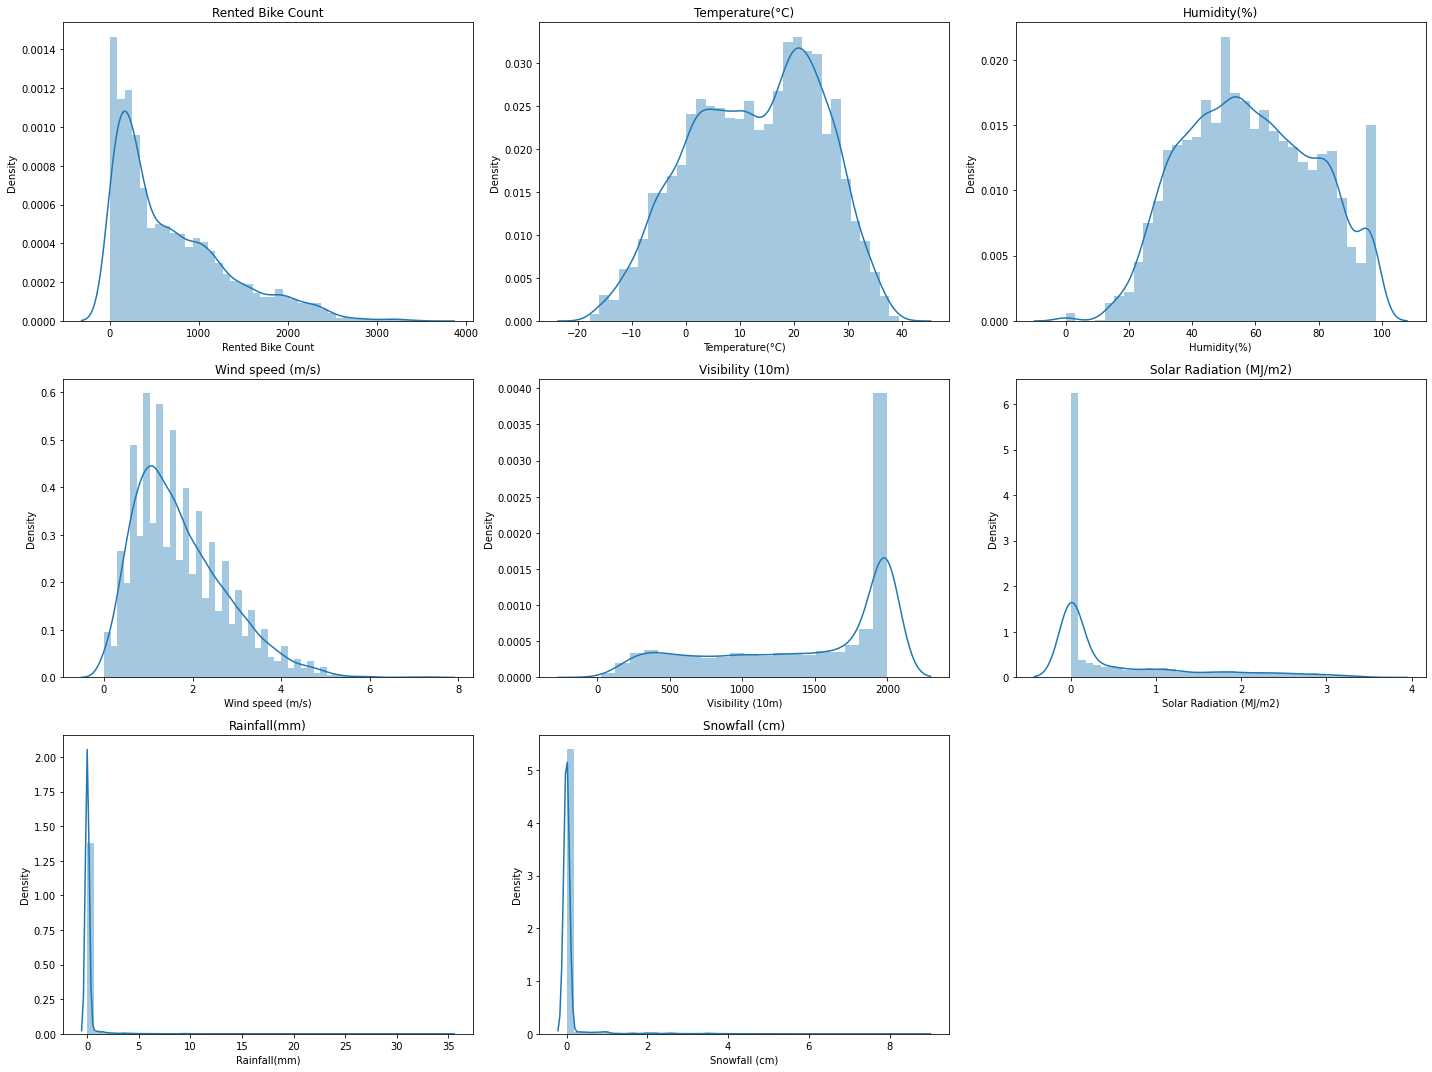

In [ ]:
#plotting all the numerical Features
n=1
plt.figure(figsize=(20,15))
for i in Numerical_Features.columns:
  plt.subplot(3,3,n)                   # subplotting all the graphs
  n=n+1
  sns.distplot(rentalbike_df[i])
  plt.title(i)
  plt.tight_layout()


As we can see a lot of variables are skewed .. so we will plot histogram to get some information about their mean and median

If the data is right skewed we will find its mean on right side of the median and if the data is left skewed we will find the mean on left side of median..

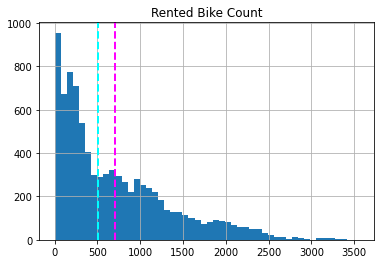

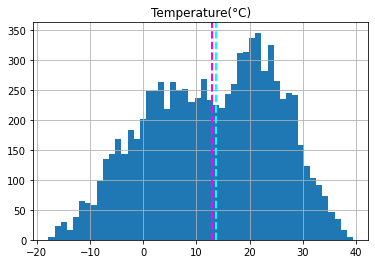

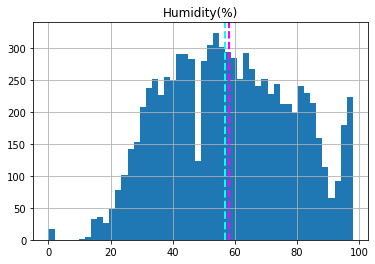

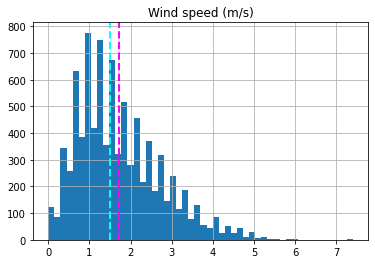

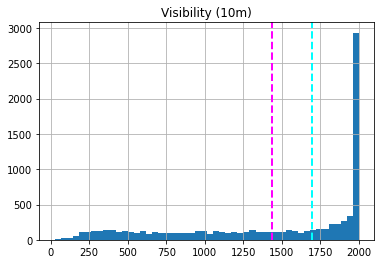

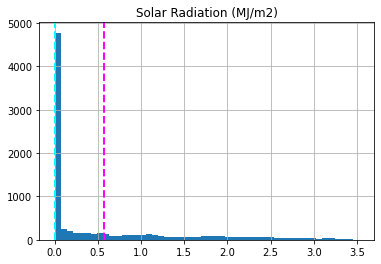

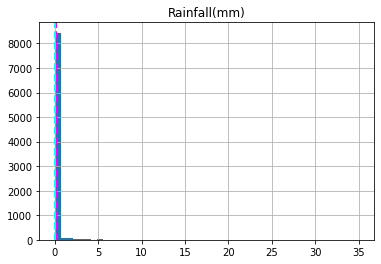

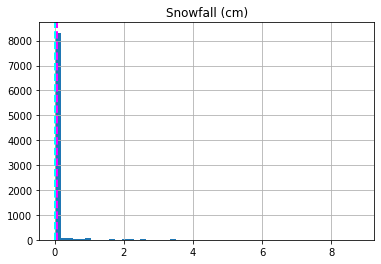

In [ ]:
#plotting histogram for all the Numerical Features of the dataset
for col in Numerical_Features[:]:  # we are looping through our Numerical_Features
  fig=plt.figure()
  ax=fig.gca()
  feature=rentalbike_df[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2) #creating a axis with magenta colour which represents mean of the feature
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    #creating a axis with cyan colour which represents median of the feature
  ax.set_title(col)

By observing 'Mean and Median' We can see the the Left or Right skewness in data.

**Right skewed columns are :**

Rented Bike Count (Dependent variable), Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm),

**Left skewed columns are :**
Visibility (10m)

# Regression PLot

 Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.

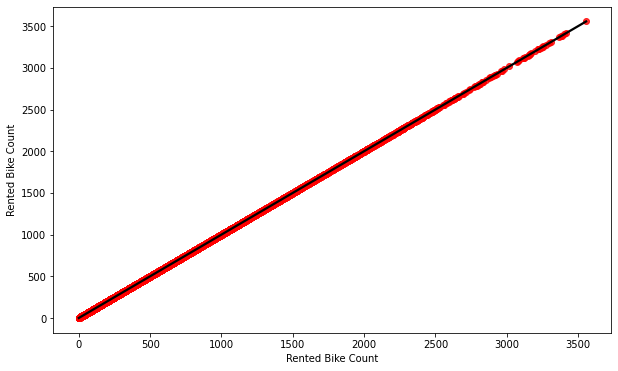

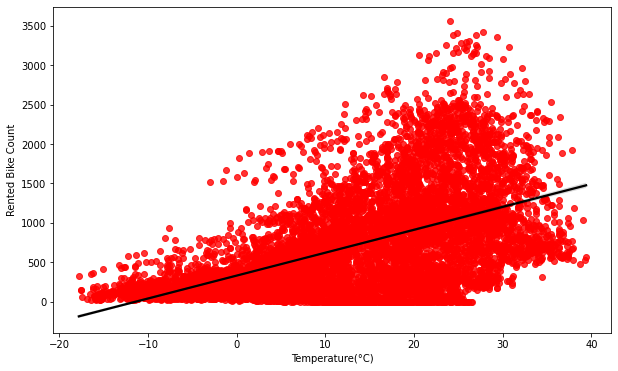

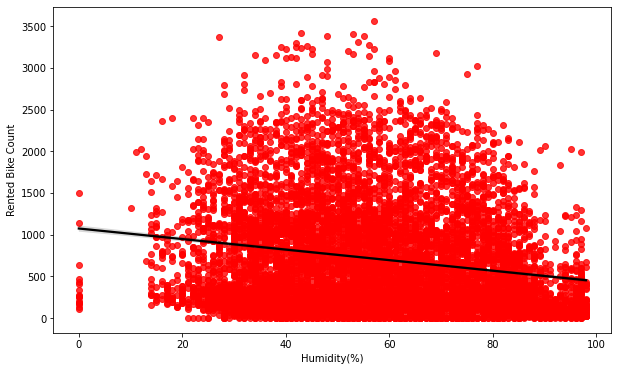

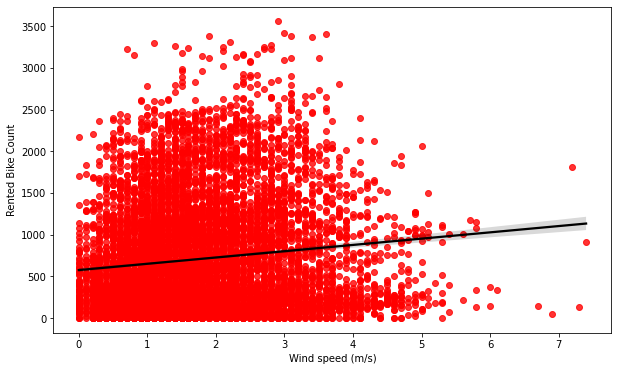

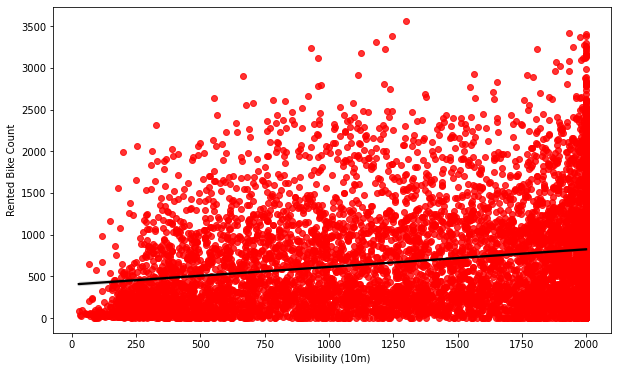

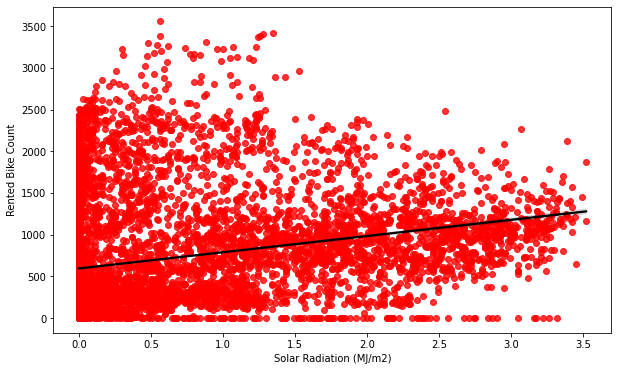

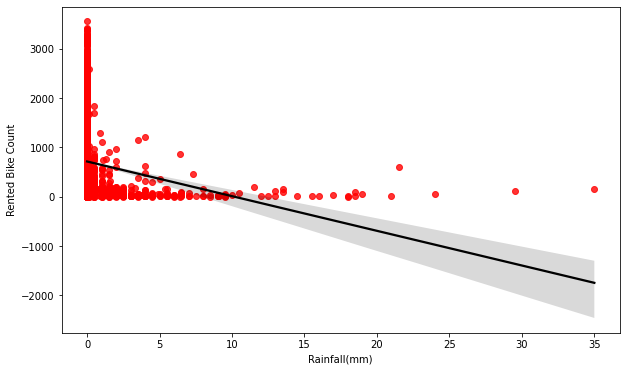

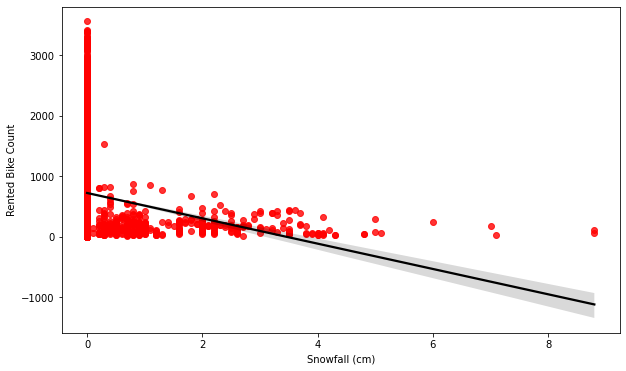

In [ ]:
#printing the regression plot for all the numerical features
for col in Numerical_Features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=rentalbike_df[col],y=rentalbike_df['Rented Bike Count'],scatter_kws={"color": 'red'}, line_kws={"color": "black"})

From above 'Regression Plots' we can see that 'Temperature',  'Wind_speed' ,       'Visibility' ,'Solar_Radiation' this features are positively related with our dependent variable.

And 'Rainfall' , 'Snowfall' , 'Humidity'  these features are negatively related with the dependent variable or Target variable

# Feature Engineering

So , As we saw our depemdent variable is right skewed. So we will try some transformations to make it normalize.

Text(0.5, 1.0, 'square')

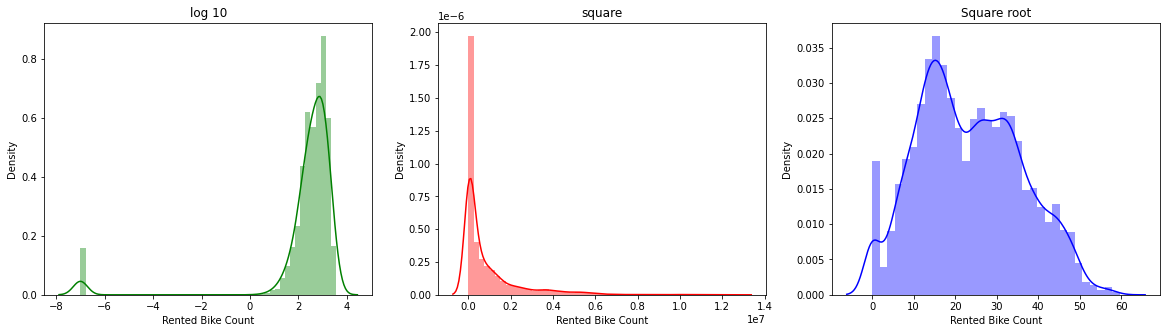

In [ ]:
#Checking with some tranformations on Dependent variable'Rented Bike Count'
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.sqrt(rentalbike_df['Rented Bike Count']),ax=axes[2], color='blue').set_title("Square root")  #applying Square root transformation
sns.distplot(np.log10(rentalbike_df['Rented Bike Count']+0.0000001),ax=axes[0],color='green').set_title("log 10")
sns.distplot((rentalbike_df['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")


As we can see 'Square Root' tranformation is normalizing the dependent variable so we will use this transformation. 

In [ ]:
C_rentalbike_df= rentalbike_df.copy()  # creating the copy of our dataset

we are creating dummy variables for our categorical features with the help of 'one hot encoding'.

In [ ]:
#creating dummy variables for our categorical features
for col in Categorical_Features :
    C_rentalbike_df= pd.concat([C_rentalbike_df , pd.get_dummies(C_rentalbike_df[col] ,prefix =col ,drop_first =True)], axis =1)
    C_rentalbike_df = C_rentalbike_df.drop([col], axis =1)
C_rentalbike_df.head()       


,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,WeekdayorWeekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
C_rentalbike_df.shape

(8760, 48)

In [ ]:
C_rentalbike_df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'WeekdayorWeekend_1'],
      dtype='object')

# Training the Model

In [ ]:
#seperating the columns as X and Y
X = C_rentalbike_df.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(C_rentalbike_df['Rented Bike Count'])

In [ ]:
pd.set_option('display.max_columns', 1000)
X.head(2)


,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,WeekdayorWeekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [ ]:
#Creat test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


# Linear Regression

In [ ]:
# building the model and fitting training data
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
# checking the score
reg.score(X_train, y_train)

0.7722101548255267

In [ ]:
reg.coef_

array([ 5.11538263e-01, -1.27236196e-01, -2.90122073e-02,  9.90615715e-04,
        8.89701409e-01, -1.48171446e+00, -8.13629988e-02, -2.04211065e+00,
       -4.95822637e+00, -7.23630435e+00, -9.51882072e+00, -9.04457949e+00,
       -4.03213994e+00,  2.27462862e+00,  7.54438892e+00,  1.25491521e+00,
       -3.27047269e+00, -3.46014138e+00, -2.74135788e+00, -2.96341191e+00,
       -3.18317912e+00, -1.92136354e+00,  1.11918595e-01,  3.83216182e+00,
        1.02397844e+01,  6.78230326e+00,  6.08102846e+00,  6.20280481e+00,
        5.04597766e+00,  1.46736086e+00, -4.81648861e-01, -1.26348263e+00,
       -4.80391365e+00,  3.51130869e+00,  2.82758278e+01, -8.13449897e-01,
       -1.53946964e+00, -6.75094331e-01,  1.73291511e+00,  4.41327425e+00,
       -1.71047504e+00, -3.96628184e+00,  6.27209321e-01,  3.28833588e+00,
        2.63349995e+00,  2.07210333e+00, -1.42458875e+00])

In [ ]:
# predict for train data
y_pred_train=reg.predict(X_train)

# predict for test data
y_pred_test=reg.predict(X_test)

In [ ]:
y_train

8639    19.467922
3614    32.480764
1387    11.045361
3900     3.316625
8044    12.124356
          ...    
4373    17.492856
7891    44.362146
4859    32.649655
3264    20.024984
2732    22.649503
Name: Rented Bike Count, Length: 6570, dtype: float64

In [ ]:
y_pred_train

array([19.82686244, 30.40419766, 19.97981989, ..., 34.4868104 ,
       22.86068817, 21.25746105])

In [ ]:
y_test

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
          ...    
475     13.784049
4732    17.804494
4958    31.874755
8244     0.000000
5246    37.815341
Name: Rented Bike Count, Length: 2190, dtype: float64

In [ ]:
y_pred_test

array([16.16457355, 22.81803818, 19.61285211, ..., 40.81315274,
        1.54093433, 31.70818986])